In [1]:
import os

os.chdir('C:\\Users\\masadl92.AD\\Documents\\Data\\Lending_Club')
os.getcwd()

import pandas as pd

loans_1=pd.read_csv('accepted_2007_to_2017.csv')

C:\Users\masadl92.AD\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
loans_1['target'] = loans_1['loan_status']

#Create 'issue_year' column
#loans_1['issue_year'] = loans_1['issue_d']
#loans_1['issue_year'] = loans_1['issue_year'].str.split('-').apply(lambda x: x[1])
#Convert issue_year to integer
#loans_1['issue_year']=loans_1['issue_year'].apply(lambda x: int(x))
#loans_1['issue_year'].value_counts()

In [11]:
loans_1['log_annual_inc'] = np.log(loans_1['annual_inc']+1)

In [12]:
#Convert target values to 0 or 1, or 2 for values that should be deleted?
replacement_dict = {"target": {"Current": 0, "Fully Paid": 0, "Charged Off": 1, "Late (31-120 days)": 0, 
                                    "In Grace Period": 0, "Late (16-30 days)": 0, "Default": 1, 
                                    "Does not meet the credit policy. Status:Fully Paid": 2, 
                                    "Does not meet the credit policy. Status:Charged Off": 2}}
loans_1.replace(replacement_dict, inplace=True)
loans_1['target'].value_counts()

0.0    1830419
1.0     170894
2.0       2749
Name: target, dtype: int64

In [13]:
loans_1 = loans_1[loans_1['target'] < 2]

In [14]:
loans_1['target'].value_counts()

0.0    1830419
1.0     170894
Name: target, dtype: int64

In [15]:
loans_1['emp_length_num'] = loans_1['emp_length']

#Convert employment length to integers
repl_dict = {"emp_length_num": {"< 1 year": 0, "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5, 
             "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9, "10+ years": 10}}

loans_1.replace(repl_dict, inplace=True)
loans_1['emp_length_num'].value_counts()

10.0    666674
2.0     181064
0.0     162127
3.0     159909
1.0     130693
5.0     123686
4.0     120688
6.0      91312
7.0      83592
8.0      83392
9.0      73394
Name: emp_length_num, dtype: int64

In [45]:
features = ['issue_d',
            'loan_amnt',                 # loan amount
            'annual_inc',                # annual income (self-reported)
            'log_annual_inc',
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'delinq_2yrs',               # the number of 30+ days past-due incidences of delinquency for the past 2 years
            'mths_since_last_major_derog',     # months since most recent 90-day or worse rating
            'revol_util',                # percent of available credit being used
            'revol_bal',
            'total_rec_late_fee',        # total late fees received to day
            'issue_year',               # issue year
            'term',                       # term of loan (36 months)
            'fico_range_low',
            'fico_range_high',
            'pub_rec',
            'inq_last_6mths',
            'installment',
           ]

#target = 'safe_loans'                   # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans_2 = loans_1[features + ['target']]
loans_2.shape

(2001313, 21)

In [46]:
loans_2 = loans_2[loans_2.issue_d.isin(['Oct-2015', 'Nov-2015', 'Dec-2015'])]

In [47]:
loans_2['issue_d'].value_counts()

Oct-2015    48631
Dec-2015    44343
Nov-2015    37530
Name: issue_d, dtype: int64

In [48]:
print(f"Data types:\n{11 * '-'}")

print(f"{loans_2.dtypes}\n")

print(f"Sum of null values in each feature:\n{35 * '-'}")

print(f"{loans_2.isnull().sum()}")

loans_2.head()

Data types:
-----------
issue_d                         object
loan_amnt                      float64
annual_inc                     float64
log_annual_inc                 float64
emp_length_num                 float64
home_ownership                  object
dti                            float64
purpose                         object
delinq_2yrs                    float64
mths_since_last_major_derog    float64
revol_util                     float64
revol_bal                      float64
total_rec_late_fee             float64
issue_year                      object
term                            object
fico_range_low                 float64
fico_range_high                float64
pub_rec                        float64
inq_last_6mths                 float64
installment                    float64
target                         float64
dtype: object

Sum of null values in each feature:
-----------------------------------
issue_d                            0
loan_amnt                        

,issue_d,loan_amnt,annual_inc,log_annual_inc,emp_length_num,home_ownership,dti,purpose,delinq_2yrs,mths_since_last_major_derog,...,revol_bal,total_rec_late_fee,issue_year,term,fico_range_low,fico_range_high,pub_rec,inq_last_6mths,installment,target
278169,Dec-2015,12000.0,65000.0,11.082158,10.0,MORTGAGE,23.84,debt_consolidation,0.0,NaN,...,9786.0,0.0,Dec-2015,60 months,785.0,789.0,0.0,0.0,253.79,0.0
278170,Dec-2015,16000.0,70000.0,11.156265,1.0,MORTGAGE,26.40,debt_consolidation,0.0,NaN,...,28705.0,0.0,Dec-2015,60 months,720.0,724.0,0.0,0.0,363.07,0.0
278171,Dec-2015,30000.0,175000.0,12.072547,2.0,MORTGAGE,18.50,home_improvement,0.0,NaN,...,21831.0,0.0,Dec-2015,36 months,725.0,729.0,0.0,1.0,1051.31,0.0
278172,Dec-2015,33600.0,104000.0,11.552156,8.0,RENT,14.01,debt_consolidation,0.0,29.0,...,28475.0,0.0,Dec-2015,36 months,690.0,694.0,0.0,2.0,1096.53,0.0
278173,Dec-2015,25000.0,109000.0,11.599112,10.0,MORTGAGE,26.02,debt_consolidation,0.0,NaN,...,20862.0,0.0,Dec-2015,36 months,745.0,749.0,0.0,1.0,777.55,0.0


In [49]:
#Fill missing values in 'emp_length_num' and 'mths_..._major_derog' with zeros
loans_2[['emp_length_num', 'mths_since_last_major_derog']] = loans_2[['emp_length_num', 'mths_since_last_major_derog']].fillna(value=0)

In [50]:
#Drop rows with missing values
loans_2.dropna(inplace=True)

In [51]:
loans_2.shape

(130457, 21)

In [52]:
loans_2['target'].sum()

15389.0

In [53]:
loans_2['purpose'].value_counts()

debt_consolidation    74471
credit_card           33014
home_improvement       8285
other                  6612
major_purchase         2534
medical                1438
car                    1134
small_business         1120
moving                  709
vacation                646
house                   418
renewable_energy         76
Name: purpose, dtype: int64

In [59]:
loans_2.groupby('purpose').agg({'target':'mean'}).head(15)

,target
purpose,
car,0.094356
credit_card,0.092022
debt_consolidation,0.127123
home_improvement,0.110078
house,0.184211
major_purchase,0.121547
medical,0.134214
moving,0.156559
other,0.130520


In [62]:
#Reduce number of categories in 'purpose'
replacement_dict = {"purpose": {"debt_consolidation": 'debt_consolidations', "credit_card": 'credit_cards', "home_improvement": 'home_improvements', 
                                    "other": 'others', "major_purchase": 'others', "medical": 'others', "small_business": 'others', 
                                    "car": 'others', "vacation": 'others',  "moving": 'others', "house": 'others', "renewable_energy": 'others', "wedding": 'others'}}
loans_2.replace(replacement_dict, inplace=True)

loans_2['purpose'].value_counts()

debt_consolidations    74471
credit_cards           33014
others                 14687
home_improvements       8285
Name: purpose, dtype: int64

In [66]:
#One-hot-encoding of 'home_ownership', 'purpose' and 'term'
loans_3 = pd.get_dummies(loans_2, columns=['purpose', 'home_ownership', 'term'])
loans_3
#loans_3 = pd.get_dummies(loans_2)

,issue_d,loan_amnt,annual_inc,log_annual_inc,emp_length_num,dti,delinq_2yrs,mths_since_last_major_derog,revol_util,revol_bal,...,purpose_credit_cards,purpose_debt_consolidations,purpose_home_improvements,purpose_others,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,term_ 36 months,term_ 60 months
278169,Dec-2015,12000.0,65000.0,11.082158,10.0,23.84,0.0,0.0,13.4,9786.0,...,0,1,0,0,0,1,0,0,0,1
278170,Dec-2015,16000.0,70000.0,11.156265,1.0,26.40,0.0,0.0,56.3,28705.0,...,0,1,0,0,0,1,0,0,0,1
278171,Dec-2015,30000.0,175000.0,12.072547,2.0,18.50,0.0,0.0,50.3,21831.0,...,0,0,1,0,0,1,0,0,1,0
278172,Dec-2015,33600.0,104000.0,11.552156,8.0,14.01,0.0,29.0,51.8,28475.0,...,0,1,0,0,0,0,0,1,1,0
278173,Dec-2015,25000.0,109000.0,11.599112,10.0,26.02,0.0,0.0,54.3,20862.0,...,0,1,0,0,0,1,0,0,1,0
278174,Dec-2015,20000.0,70000.0,11.156265,10.0,16.90,0.0,69.0,42.0,31200.0,...,0,1,0,0,0,0,1,0,0,1
278175,Dec-2015,28000.0,75000.0,11.225257,10.0,31.88,0.0,0.0,51.9,43413.0,...,0,1,0,0,0,1,0,0,0,1
278176,Dec-2015,12000.0,40000.0,10.596660,3.0,31.95,3.0,0.0,41.4,11008.0,...,1,0,0,0,0,0,0,1,1,0
278177,Dec-2015,11550.0,38000.0,10.545368,5.0,21.07,0.0,0.0,39.7,7179.0,...,1,0,0,0,0,0,0,1,0,1
278178,Dec-2015,2500.0,50000.0,10.819798,10.0,17.60,3.0,18.0,31.1,732.0,...,0,0,0,1,0,1,0,0,1,0


In [68]:
loans_3.columns.tolist()

['issue_d',
 'loan_amnt',
 'annual_inc',
 'log_annual_inc',
 'emp_length_num',
 'dti',
 'delinq_2yrs',
 'mths_since_last_major_derog',
 'revol_util',
 'revol_bal',
 'total_rec_late_fee',
 'issue_year',
 'fico_range_low',
 'fico_range_high',
 'pub_rec',
 'inq_last_6mths',
 'installment',
 'target',
 'purpose_credit_cards',
 'purpose_debt_consolidations',
 'purpose_home_improvements',
 'purpose_others',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'term_ 36 months',
 'term_ 60 months']

In [69]:
loans = loans_3.drop(['issue_d', 'annual_inc', 'issue_year', 'fico_range_low'], axis=1)

In [70]:
loans.columns.tolist()

['loan_amnt',
 'log_annual_inc',
 'emp_length_num',
 'dti',
 'delinq_2yrs',
 'mths_since_last_major_derog',
 'revol_util',
 'revol_bal',
 'total_rec_late_fee',
 'fico_range_high',
 'pub_rec',
 'inq_last_6mths',
 'installment',
 'target',
 'purpose_credit_cards',
 'purpose_debt_consolidations',
 'purpose_home_improvements',
 'purpose_others',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'term_ 36 months',
 'term_ 60 months']

# Machine learning

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# Split data into training and test sets
y = loans.target
X = loans.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                        test_size=0.2, 
                                                                        random_state=123,
                                                                        stratify=y)

## Tree-based-methods

In [79]:
# Define and fit Decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(max_depth=5)
dtree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
y_pred_dtree = dtree_clf.predict(X_test)

In [89]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_dtree))
print(classification_report(y_test,y_pred_d_tree))

[[23008     6]
 [ 3072     6]]
             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94     23014
        1.0       0.50      0.00      0.00      3078

avg / total       0.84      0.88      0.83     26092



## Random forest

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler



# Build random forest classifier (same config)

rf_clf = RandomForestClassifier(n_estimators=500,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")


# Build model with no sampling

pip_orig = make_pipeline(RobustScaler(),
                         rf_clf)

scores = cross_val_score(pip_orig,
                         X_train, y_train,
                         scoring="roc_auc", cv=10)

print(f"Original model's average AUC: {scores.mean():.3f}")



# Build model with undersampling

#pip_undersample = imb_make_pipeline(RobustScaler(),
#                                    RandomUnderSampler(),
#                                    rf_clf)

#scores = cross_val_score(pip_undersample,
#                         X_train, y_train,
#                         scoring="roc_auc", cv=10)

#print(f"Under-sampled model's average AUC: {scores.mean():.3f}")



# Build model with oversampling

#pip_oversample = imb_make_pipeline(RobustScaler(),
#                                   RandomOverSampler(),
#                                   rf_clf)

#scores = cross_val_score(pip_oversample,
#                         X_train, y_train,
#                         scoring="roc_auc", cv=10)

#print(f"Over-sampled model's average AUC: {scores.mean():.3f}")

Original model's average AUC: 0.686


In [85]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=0.25,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [86]:
y_pred_rf = rf_clf.predict(X_test)

In [90]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[23001    13]
 [ 3067    11]]
             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94     23014
        1.0       0.46      0.00      0.01      3078

avg / total       0.83      0.88      0.83     26092



In [95]:
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
indices.shape

(23,)

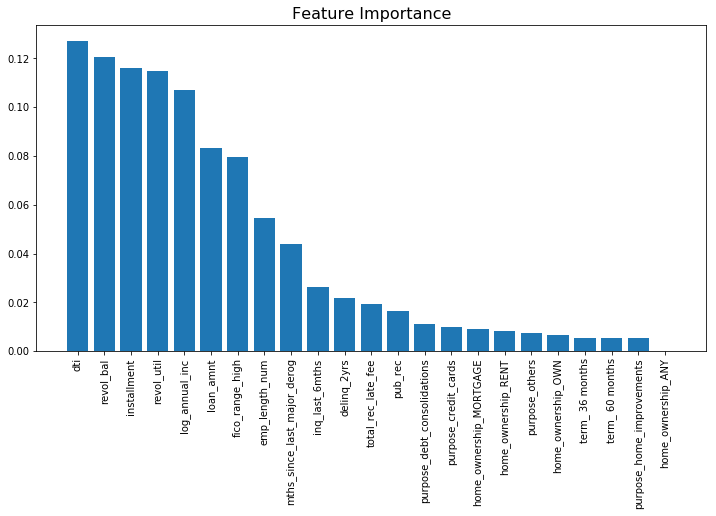

In [96]:
# Plot features importance, might need to change 24 to another value depending on the number of features

importances = rf_clf.feature_importances_

indices = np.argsort(rf_clf.feature_importances_)[::-1]

plt.figure(figsize=(12, 6))

plt.bar(range(1, 24), importances[indices], align="center")

plt.xticks(range(1, 24),

           loans.columns[loans.columns != "target"][indices],

           rotation=90)

plt.title("Feature Importance", {"fontsize": 16});

## Logistic regression

In [ ]:
from sklearn.linear_models import LogisticRegression
